## Model Fitting

Let's fit some regression models.

First we should define a baseline classifier for comparing the performance of our models. Best choice for regression problems is the median value of output variable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [108]:
# load previously saved data
data = pd.read_csv('ubaar_data.csv', index_col='ID')

In [109]:
from sklearn.model_selection import train_test_split

# Define a function for splitting Data to train and test sets, in a stratified manner
def split_data(X, y):
    bins = np.linspace(0, len(y), 100)
    y_binned = np.digitize(y, bins)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y_binned)
    return x_train, x_test, y_train, y_test

# Define cost function MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [110]:
# Make training and testing sets
X, y = data.drop('logPrice', axis=1), data['logPrice']
x_train, x_test, y_train, y_test = split_data(X, y)

# Define a baseline estimate -> median of output variable in training dataset
baseline_estimate = y_train.median()
print('Baseline estimate for logPrice: ', baseline_estimate)

# Calculate error for baseline estimator
e = mean_absolute_percentage_error(y_true=np.exp(y_test), y_pred=np.exp(baseline_estimate))
print('Baseline estimator error: ', e)

Baseline estimate for logPrice:  15.274125580663789
Baseline estimator error:  73.0520594424339


In [111]:
# Define a function for calculating k-fold cross validation score on the whole data given a model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def error_calculator(model, X, y, cv=5): 
    def score_func(y, y_pred):
        y_true = np.exp(y)
        y_pred = np.exp(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        
    scores = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(score_func=score_func))
    print('{} +- {}'.format(scores.mean(), scores.std() * 2))
    return scores

In [112]:
# Define a function for residual plot
from sklearn.preprocessing import StandardScaler

def residual_plot(model, X, Y):
    x_train, x_test, y_train, y_test = split_data(X, Y)
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    res_train = y_train - y_pred_train
    res_test = y_test - y_pred_test
    
    fig, [ax0, ax1] = plt.subplots(2, 1, figsize=(14, 10))
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
    tableau20 = [(i[0]/255., i[1]/255., i[2]/255.) for i in tableau20]
    %matplotlib inline
    
    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]

    ################################
    # Plot res-plot for training set
    x = StandardScaler().fit_transform(y_pred_train.reshape(-1, 1))
    y = StandardScaler().fit_transform(res_train.reshape(-1, 1))
    fig1 = plt.figure(figsize=(14, 10))
    fig1.suptitle('Residual plot for training set')
    
    # start with a rectangular Figure
    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)
    
    # the scatter plot:
    axScatter.scatter(x, y, color=tableau20[0], alpha=0.5)
    
    # now determine nice limits by hand:
    n_bins = 100

    x_limp = x.max() + x.std()
    x_limn = x.min() - x.std()
    y_limp = y.max() + y.std()
    y_limn = y.min() - y.std()

    axScatter.set_xlim((x_limn, x_limp))
    axScatter.set_ylim((y_limn, y_limp))
    axScatter.set_xlabel('Estimated output')
    axScatter.set_ylabel('Residuals')

    axHistx.hist(x, bins=n_bins, color=tableau20[1], alpha=0.75)
    axHisty.hist(y, bins=n_bins, orientation='horizontal', color=tableau20[2], alpha=0.75)

    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())
    
    
    ################################
    # Plot res-plot for testing set
    x = StandardScaler().fit_transform(y_pred_test.reshape(-1, 1))
    y = StandardScaler().fit_transform(res_test.reshape(-1, 1))
    fig2 = plt.figure(figsize=(14, 10))
    fig2.suptitle('Residual plot for testing set')
    
    # start with a rectangular Figure
    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)
    
    # the scatter plot:
    axScatter.scatter(x, y, color=tableau20[0], alpha=0.5)
    
    # now determine nice limits by hand:
    n_bins = 100

    x_limp = x.max() + x.std()
    x_limn = x.min() - x.std()
    y_limp = y.max() + y.std()
    y_limn = y.min() - y.std()

    axScatter.set_xlim((x_limn, x_limp))
    axScatter.set_ylim((y_limn, y_limp))
    axScatter.set_xlabel('Estimated output')
    axScatter.set_ylabel('Residuals')

    axHistx.hist(x, bins=n_bins, color=tableau20[1], alpha=0.75)
    axHisty.hist(y, bins=n_bins, orientation='horizontal', color=tableau20[2], alpha=0.75)

    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())
    plt.show()

24.703333613505155 +- 0.285696320026911


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


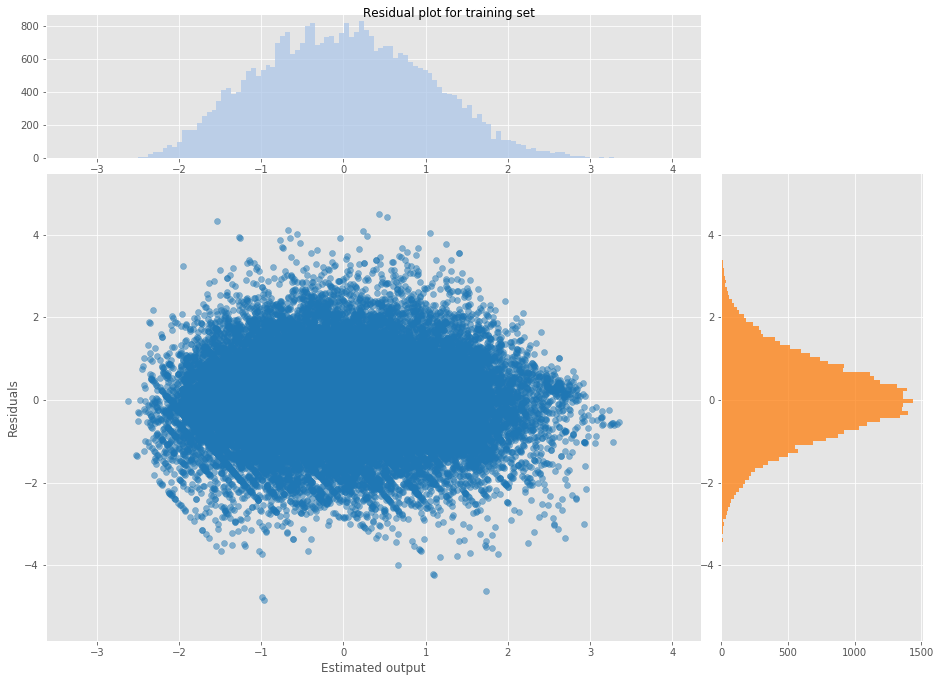

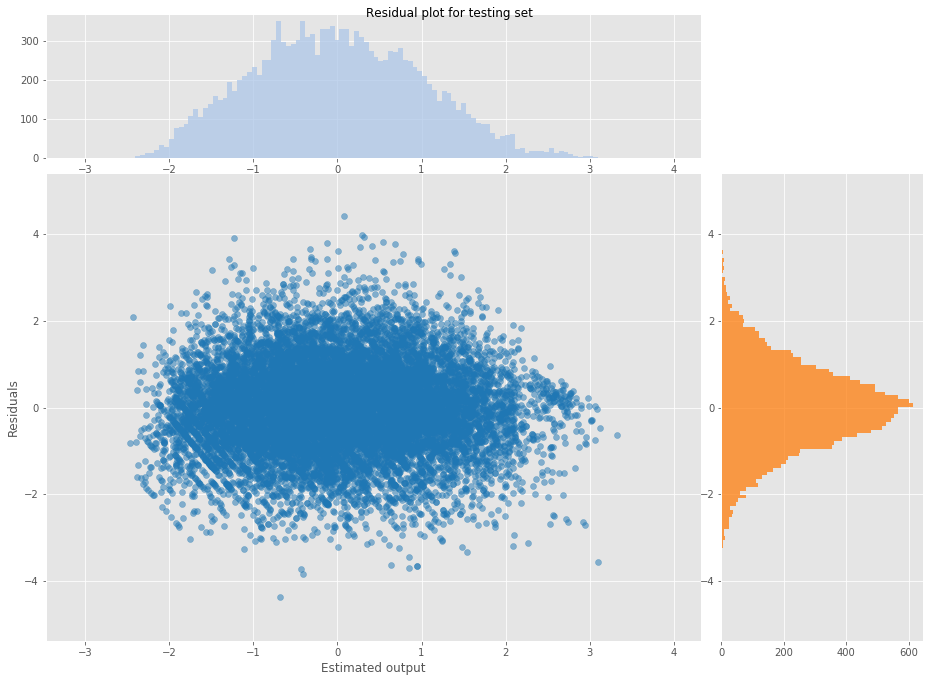

In [113]:
# Fit a simple LinearRegression model to data
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
error_calculator(lr, X, y, cv=3)
residual_plot(lr, X, y)

24.654576031861342 +- 0.21104897630092015


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


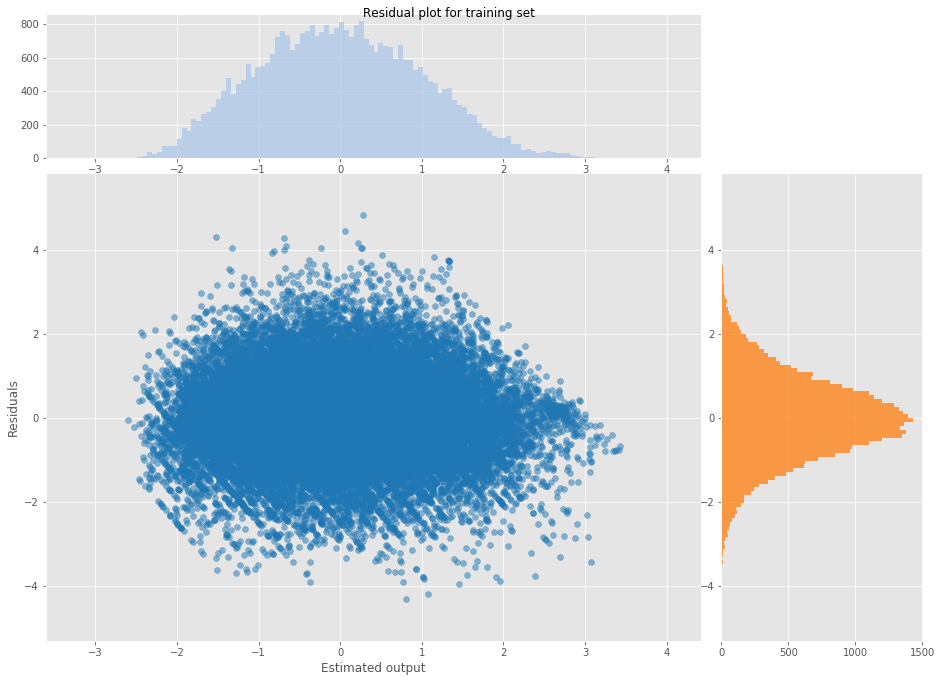

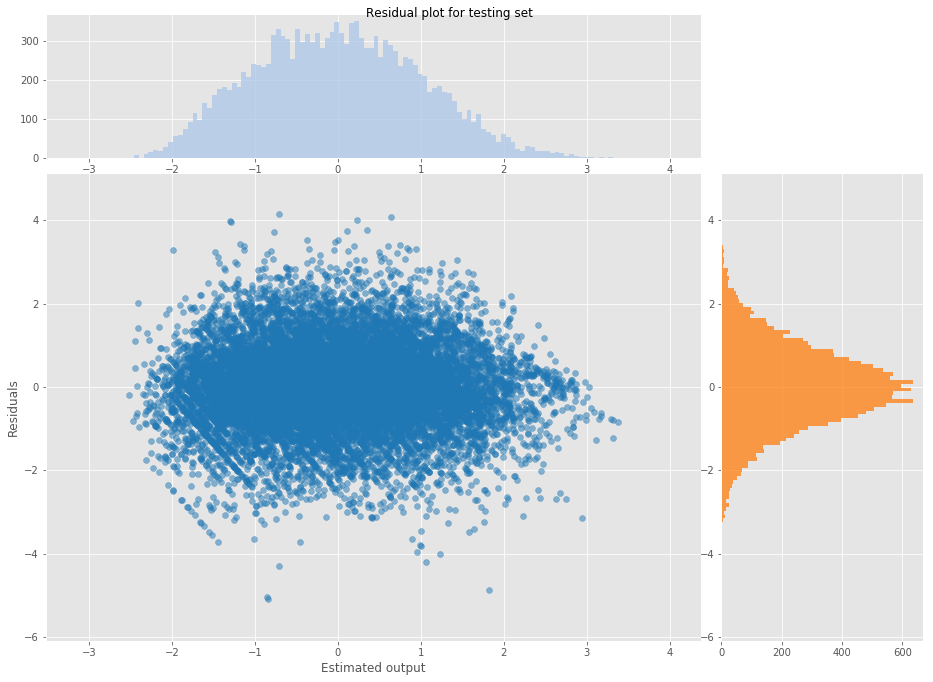

In [114]:
# Fit a robust linear model using RANSAC
from sklearn.linear_model import RANSACRegressor

ransaclr = RANSACRegressor(LinearRegression(), min_samples=0.1, max_trials=500)
error_calculator(ransaclr, X, y, cv=3)
residual_plot(ransaclr, X, y)

In [ ]:
# Ridge regression, regularized model
from sklearn.linear_model import Ridge

rlr = Ridge(alpha=0.01, max_iter=5000)
error_calculator(rlr, X, y, cv=5)
rlr.fit(x_train, y_train)
residual_plot(rlr, x_train, x_test, y_train, y_test)

25.16006315271612 +- 0.23696121418787847


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


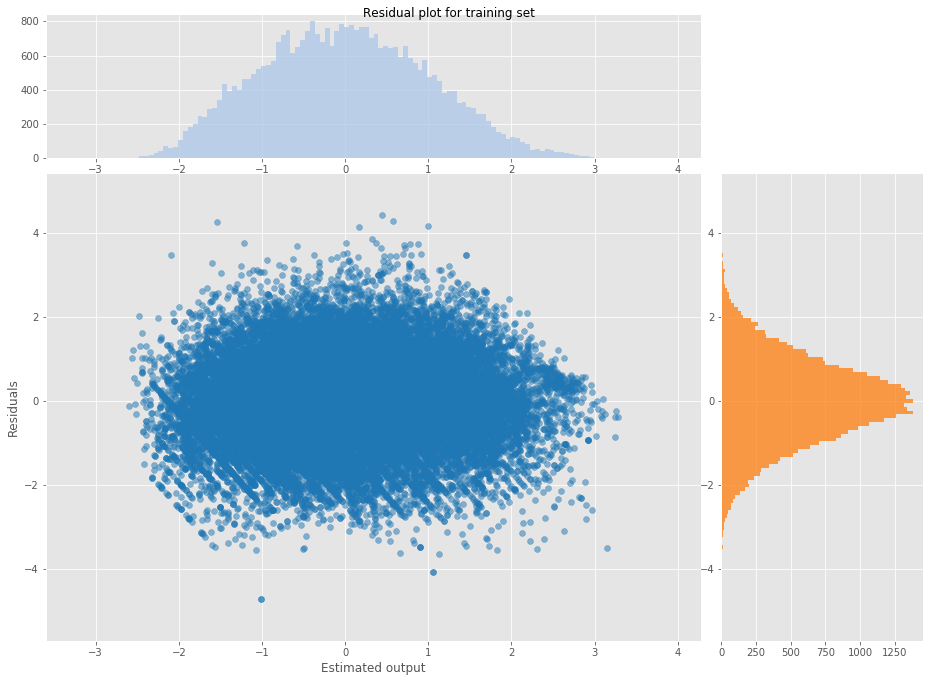

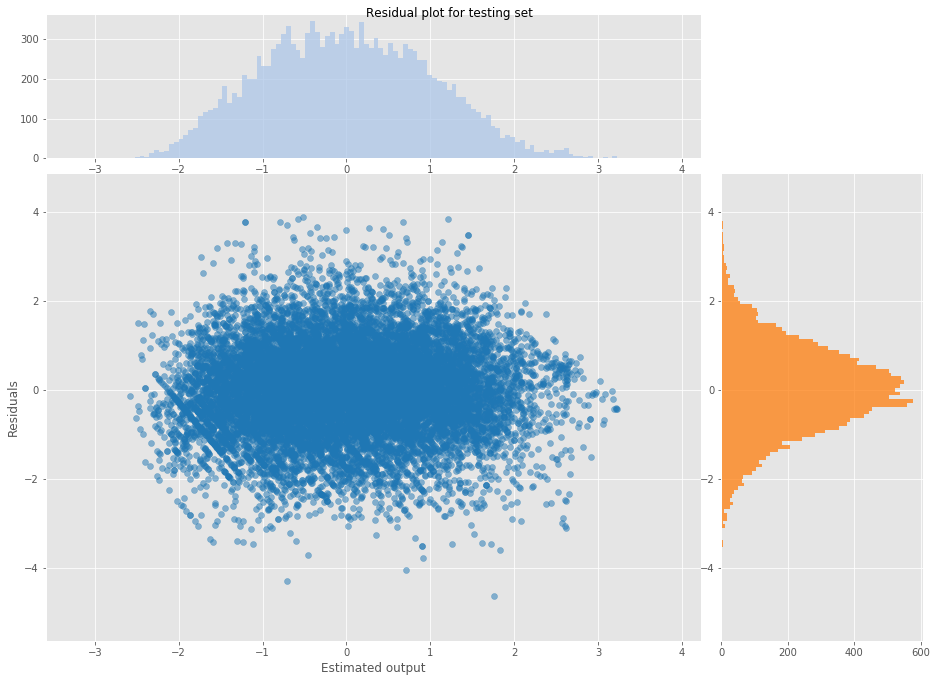

In [115]:
# Lasso regression, regularized model
from sklearn.linear_model import Lasso

llr = Lasso(alpha=0.001, max_iter=5000)
error_calculator(llr, X, y, cv=3)
residual_plot(llr, X, y)

24.91151334385358 +- 0.23241456059146226


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


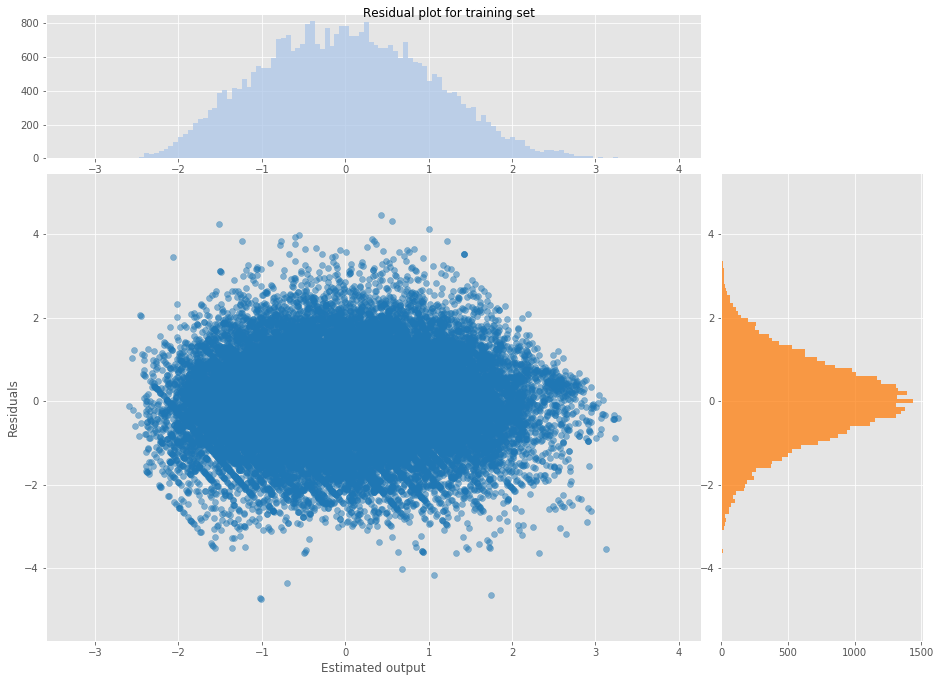

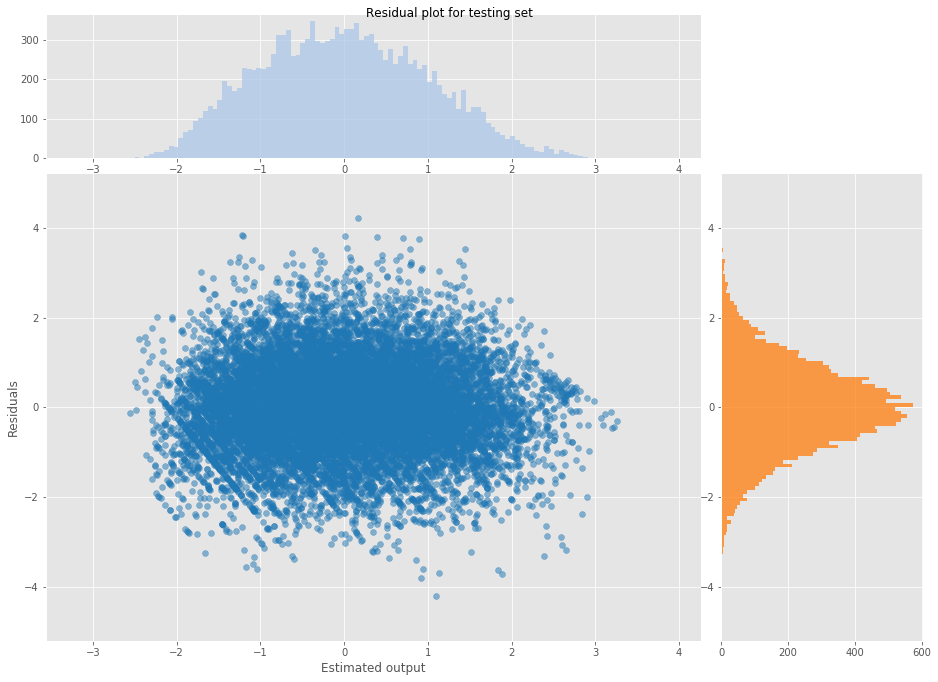

In [116]:
# ElasticNet regression, regularized model
from sklearn.linear_model import ElasticNet

elr = ElasticNet(alpha=0.001, max_iter=5000)
error_calculator(elr, X, y, cv=3)
residual_plot(elr, X, y)

23.35434415002513 +- 0.20597966562072154


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


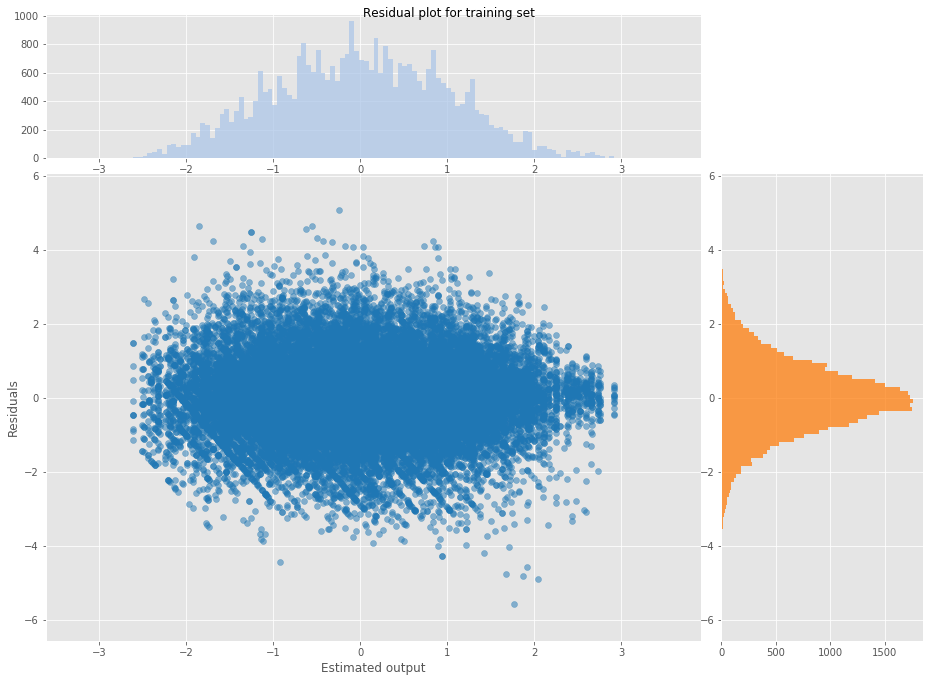

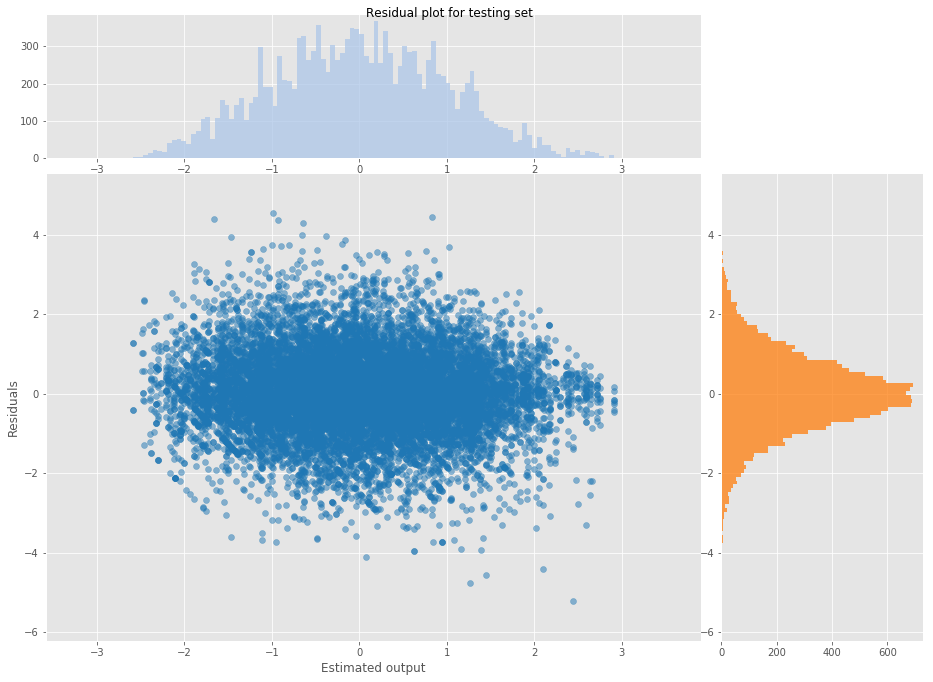

In [117]:
# Fitting a single DecisionTree regressor
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(criterion='mse', splitter='random', min_samples_leaf=10)
error_calculator(dtr, X, y, cv=5)
residual_plot(dtr, X, y)

20.33661979922039 +- 0.036428148571087844


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


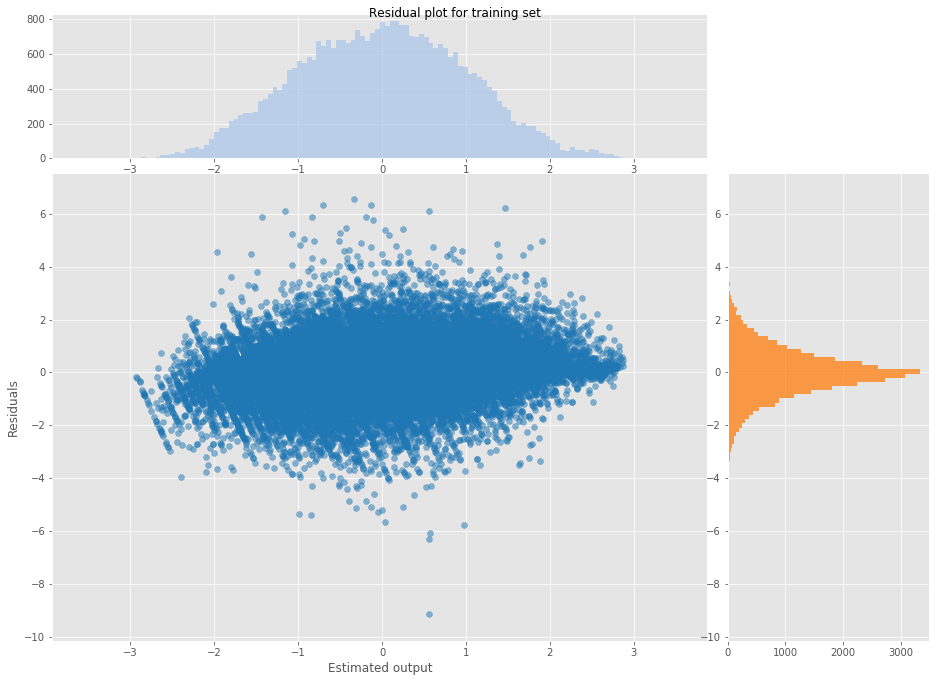

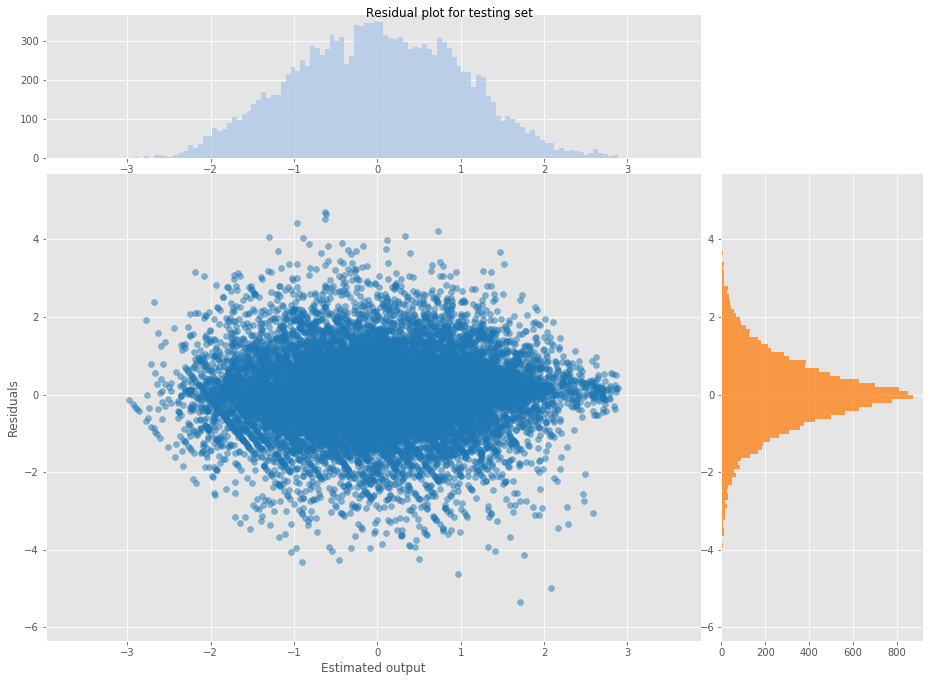

In [118]:
# Fit a RandomForest regressor
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, n_jobs=6, criterion='mse', max_features=0.7, min_samples_leaf=1)
error_calculator(rfr, X, y, cv=3)
residual_plot(rfr, X, y)

In [ ]:
# Fit a GBM regressor
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, max_depth=10)
error_calculator(gbr, X, y, cv=5)
gbr.fit(x_train, y_train)
residual_plot(gbr, x_train, x_test, y_train, y_test)

19.80512635672122 +- 0.22760988742121846


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


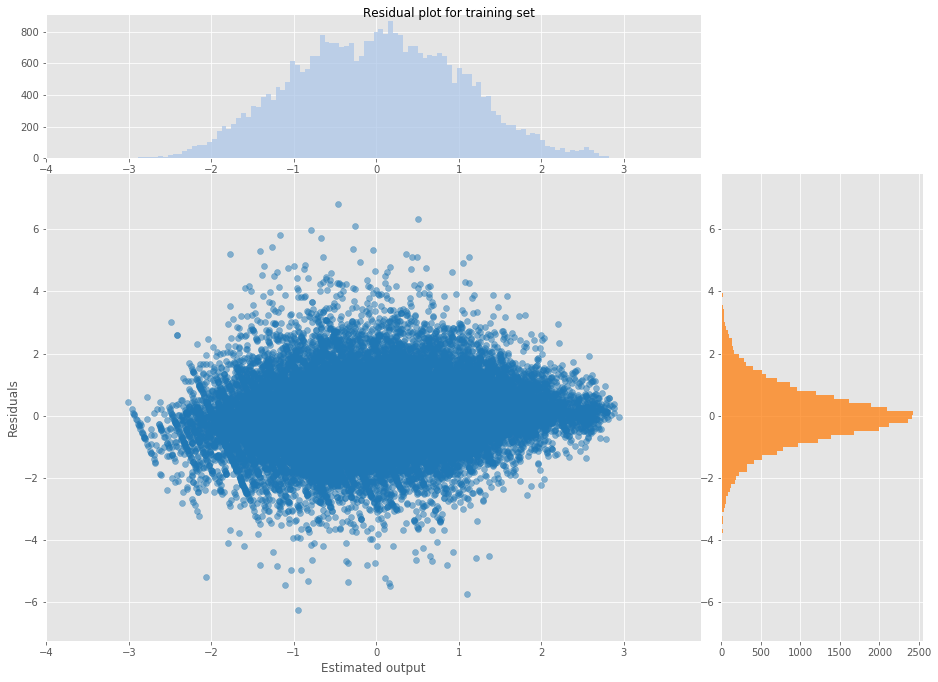

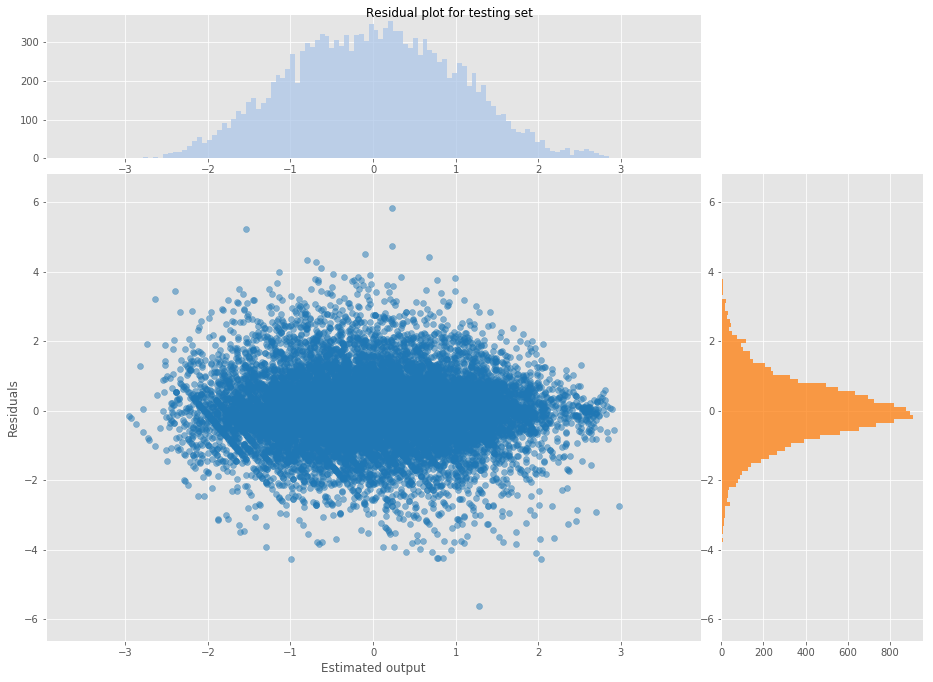

In [119]:
# Fit a LightGBM regressor
import lightgbm as lgb
import seaborn

lgbr = lgb.LGBMModel(boosting_type='gbdt',
                     objective='regression',
                     n_estimators=1000,
                     num_leaves=100,
                     min_child_samples=2,
                     bagging_fraction=0.9,
                     val_metric='mape')
error_calculator(lgbr, X, y, cv=3)
residual_plot(lgbr, X, y)

22.973935337495234 +- 0.7166777626638576


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


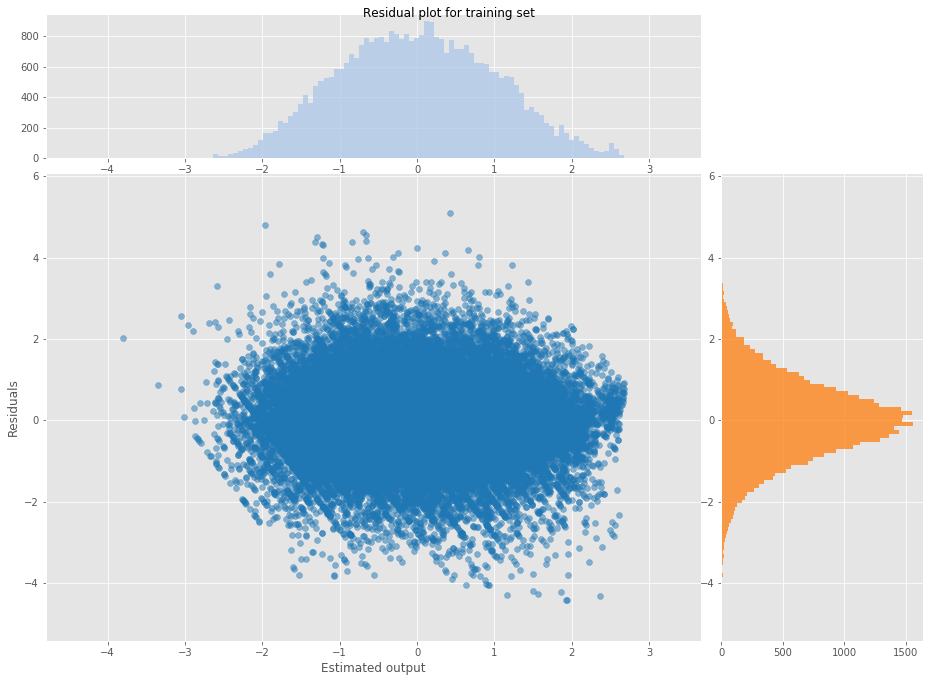

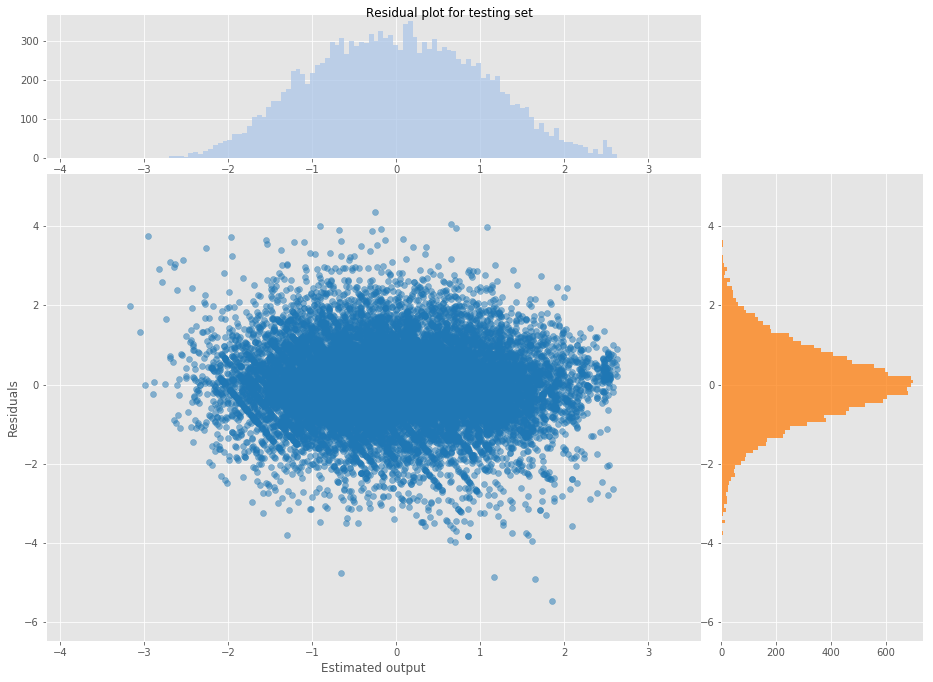

In [120]:
# Fit a MLP regressor
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(50, 50), activation='tanh')
error_calculator(mlp, X, y, cv=3)
residual_plot(mlp, X, y)

It's obvious that nonlinear algorithms like MLP, RandomForest and GradientBoosting make better estimators for this problem. Let's try to fine-tune these three algorithms.